In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score


LOADING THE DATA


In [23]:
df = pd.read_excel('C:/Users/aravi/Downloads/Bankruptcy_data(1).xlsx')

EXPLORATORY DATA ANALYSIS 

In [27]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [19]:
df.isna().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


DATA CLEANING 

In [8]:
df_filled =df.fillna(df.mean())

In [9]:
df_filled

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,1.294075,1.900108,0.343322,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


CLEANING DATA BY REMOVING NULL VALUE BY THE MEDIAN 

In [10]:
df_filled =df.fillna(df.median())

In [11]:
df_filled

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.051844,0.059733,0.017241,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


In [37]:
df_filled.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.051844,0.059733,0.017241,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [38]:
df_filled.tail()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0
92871,-0.648028,-0.036524,-0.219774,-0.144842,0.693342,0.222476,-0.651048,-0.498483,55.624410,-0.063630,0.064574,0.062500,1


In [12]:
df_filled.isna().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

CHECKING FOR OUTLIERS

<AxesSubplot:>

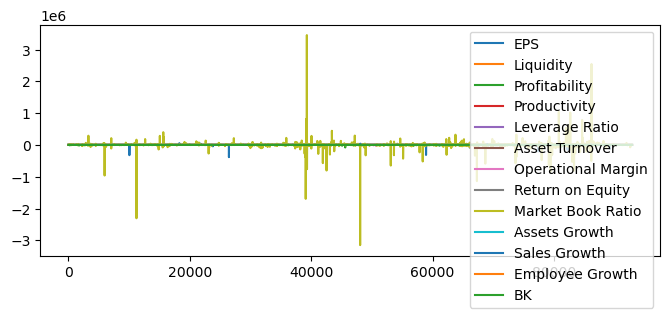

In [34]:
df_filled.plot(figsize=(8,3))

<AxesSubplot:>

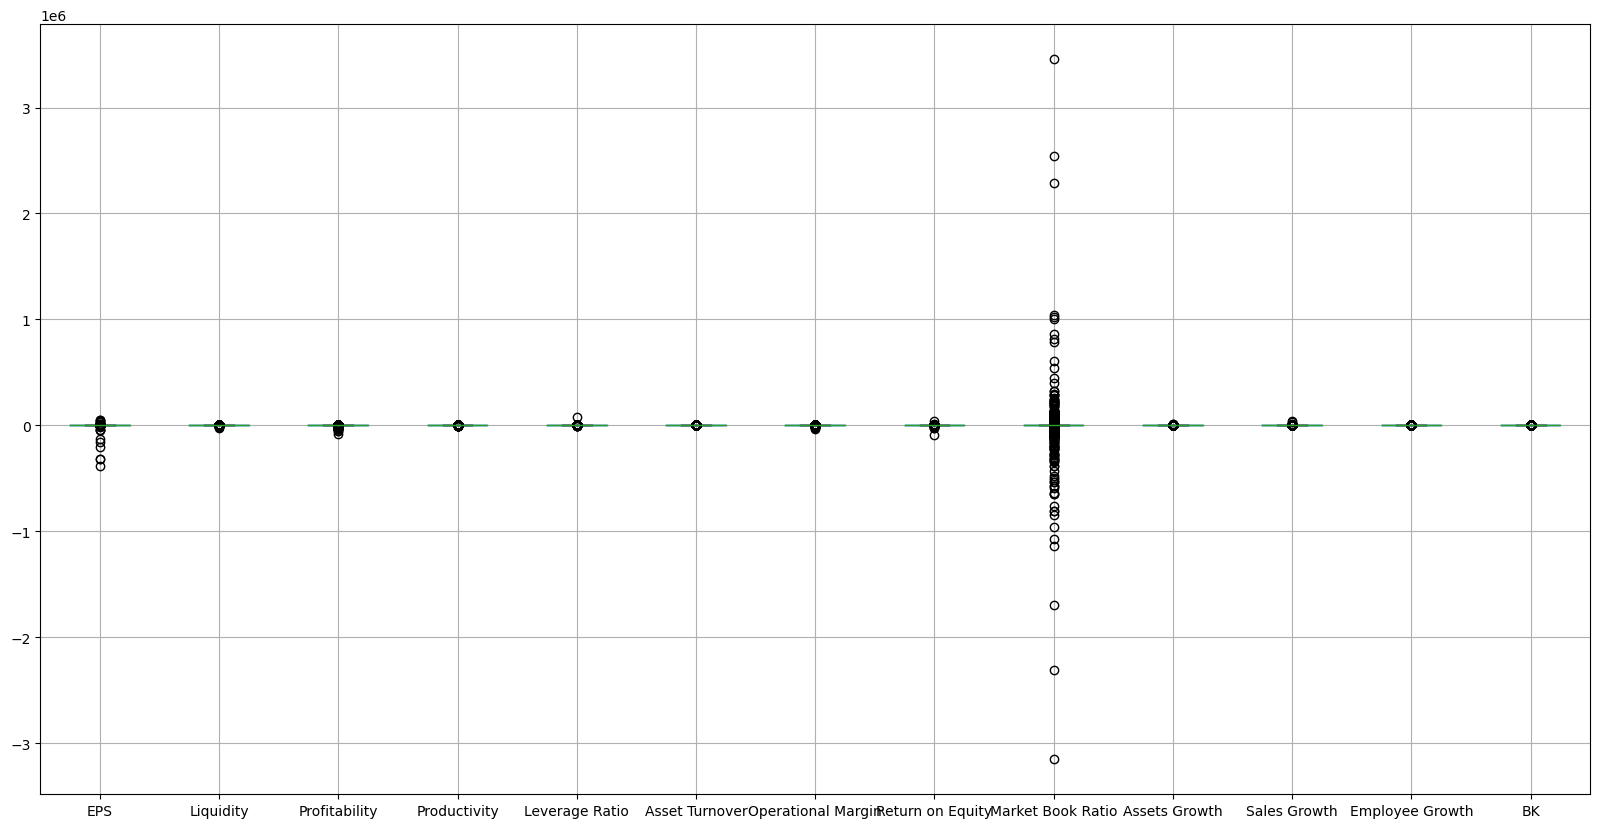

In [32]:
df_filled.boxplot(figsize=(20,10))

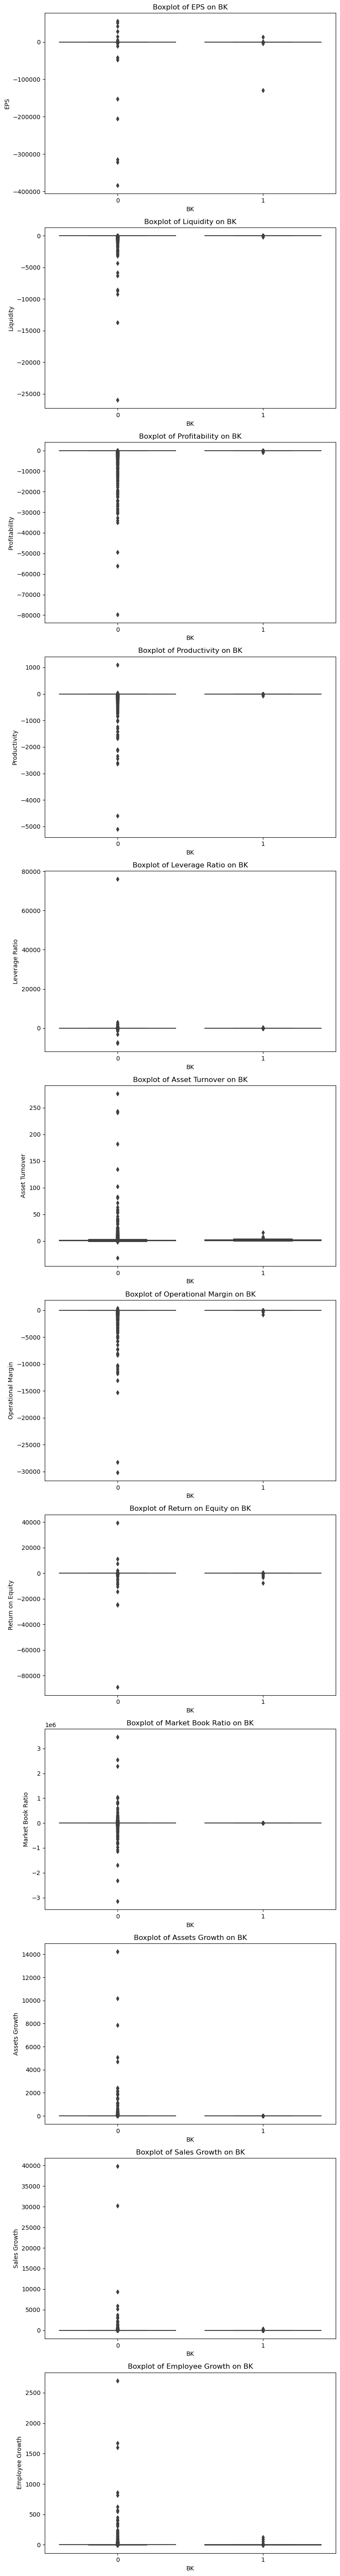

In [54]:
features=['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']
fig, axes=plt.subplots(nrows=len(features),ncols=1,figsize=(8,5*len(features)))
for i,col in enumerate(features):
    ax=axes[i]
    sns.boxplot(x='BK',y=col,
               data=df_filled,ax=ax)
    ax.set_xlabel('BK')
    ax.set_ylabel(col)
    ax.set_title(f'Boxplot of {col} on BK')
    
plt.tight_layout()
plt.show()




In [73]:
print(df_filled.describe())

                 EPS     Liquidity  Profitability  Productivity  \
count   92872.000000  92872.000000   92872.000000  92872.000000   
mean      -14.460559     -2.623734     -29.458531     -1.219459   
std      2195.408190    121.449182     676.331204     35.837865   
min   -384000.000000 -25968.520000  -79682.000000  -5093.000000   
25%        -0.140000      0.020000      -0.630000     -0.060000   
50%         0.330000      0.190000       0.070000      0.060000   
75%         1.530000      0.400000       0.310000      0.110000   
max     55339.000000      1.000000     140.580000   1102.000000   

       Leverage Ratio  Asset Turnover  Operational Margin  Return on Equity  \
count    92872.000000    92872.000000        92872.000000      92872.000000   
mean         1.345018        1.053018           -7.438272         -2.112197   
std        253.002671        2.113161          207.953537        352.581716   
min      -7811.000000      -31.590000       -30175.700000     -88875.140000   
2

REMOVING THE OUTLIERS 

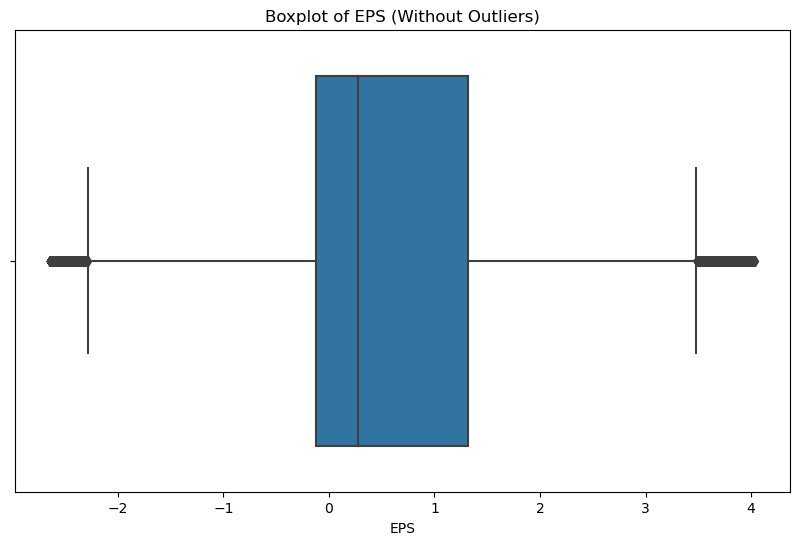

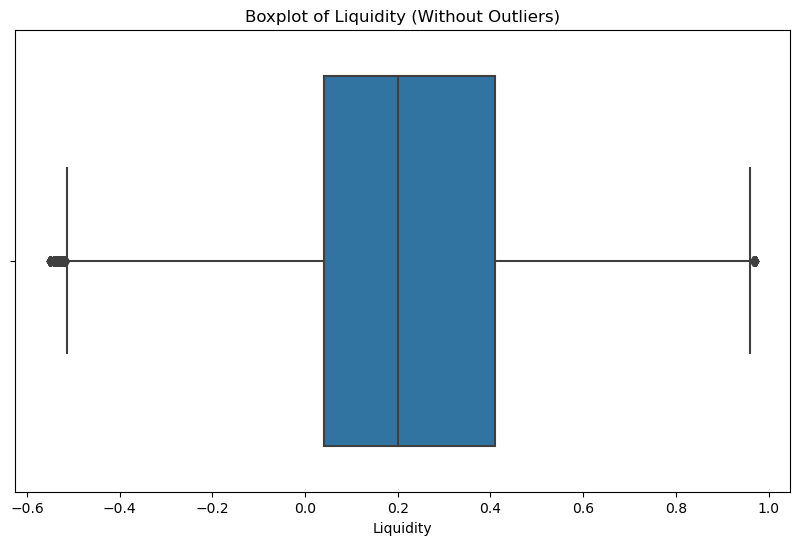

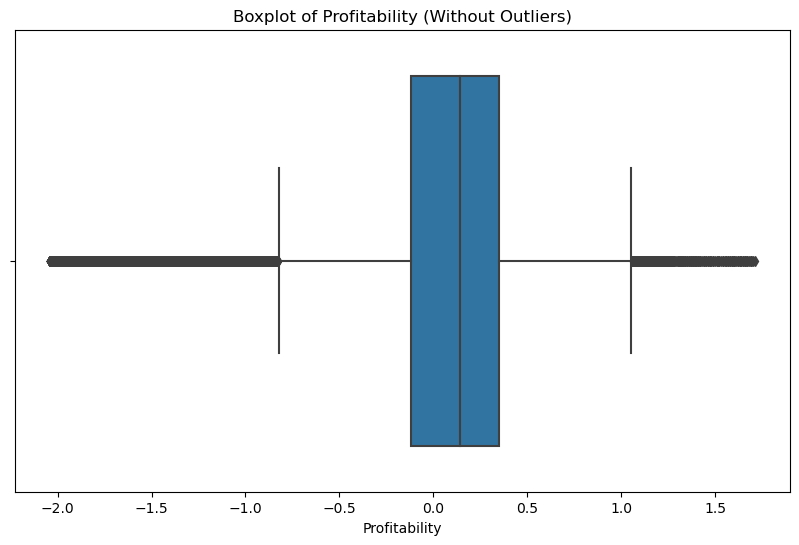

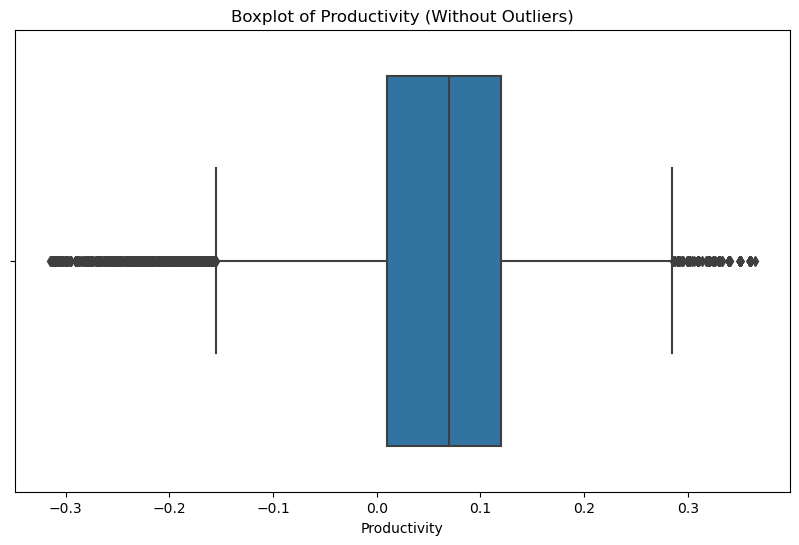

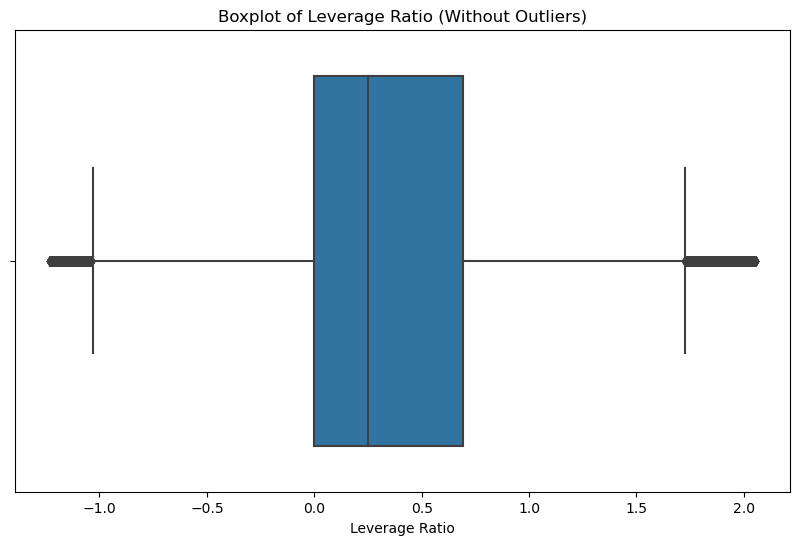

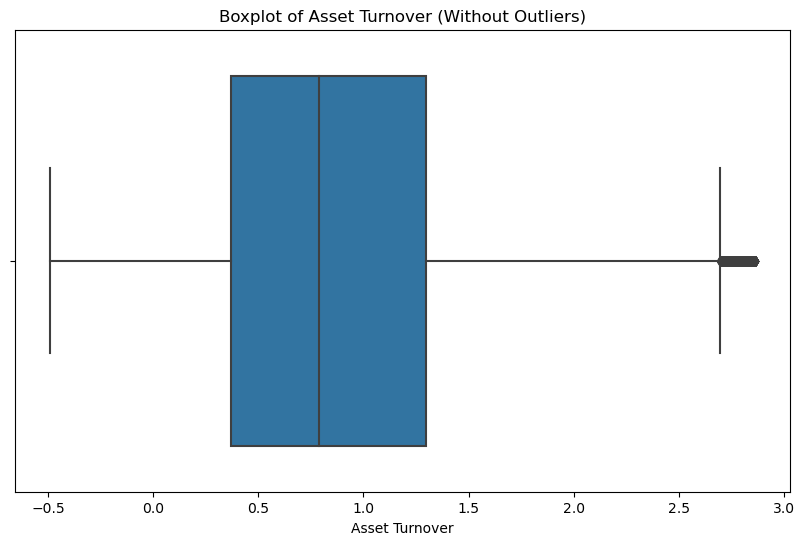

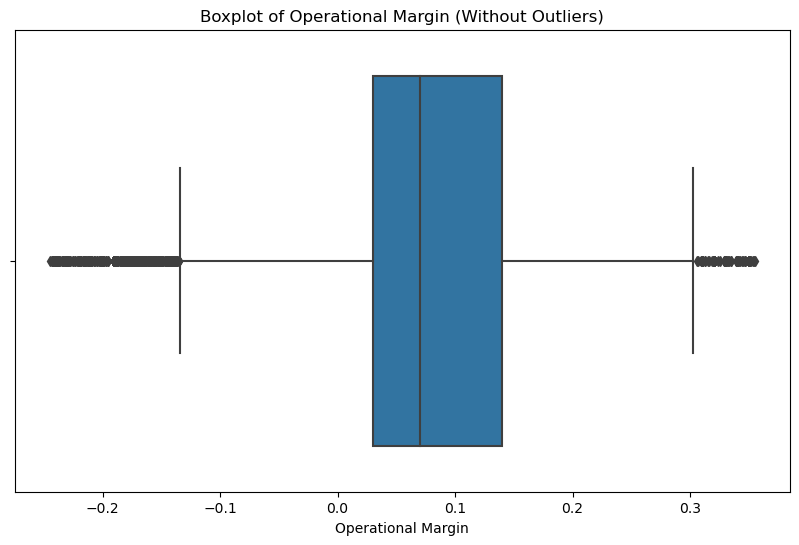

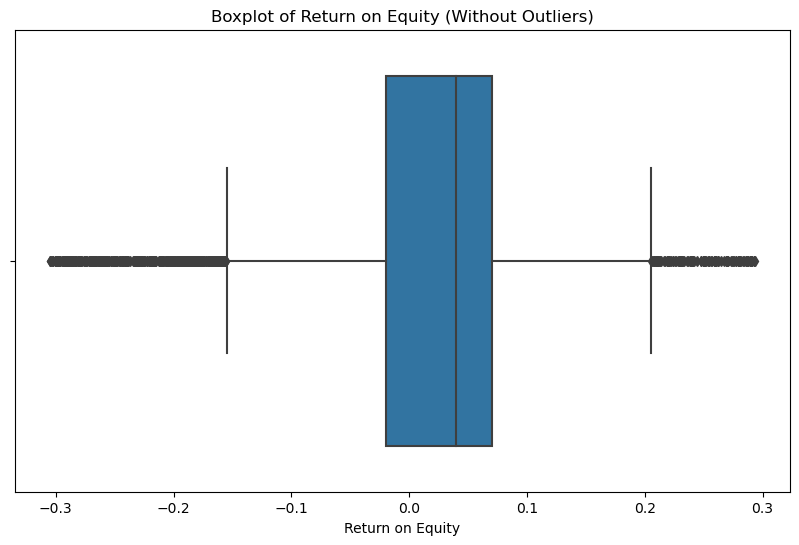

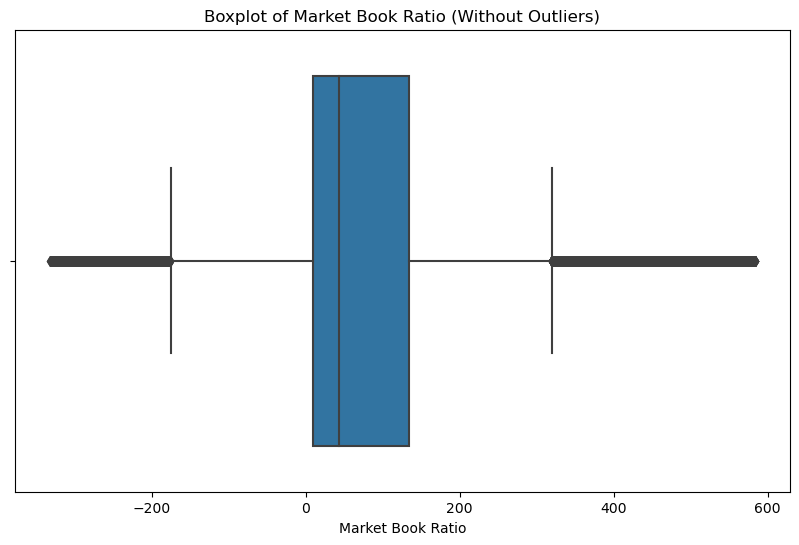

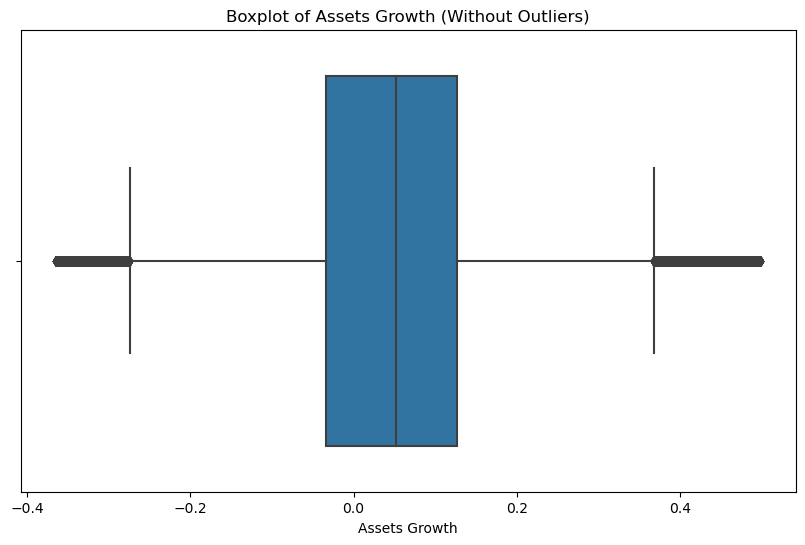

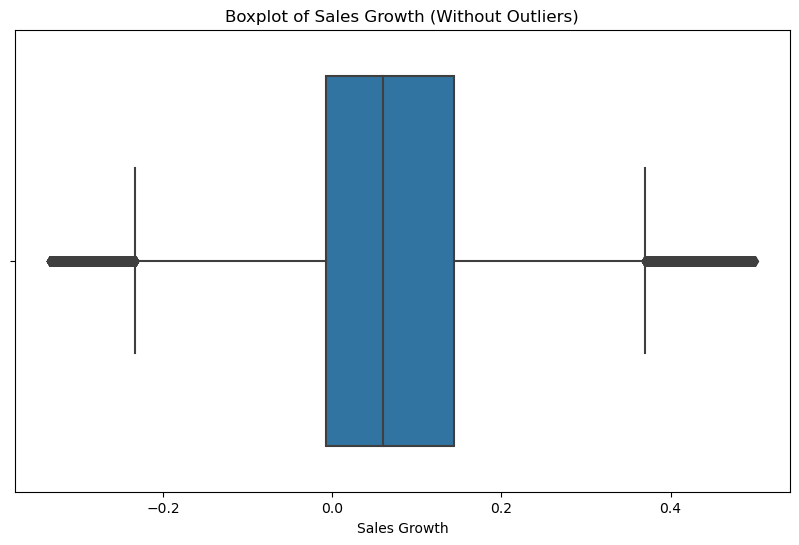

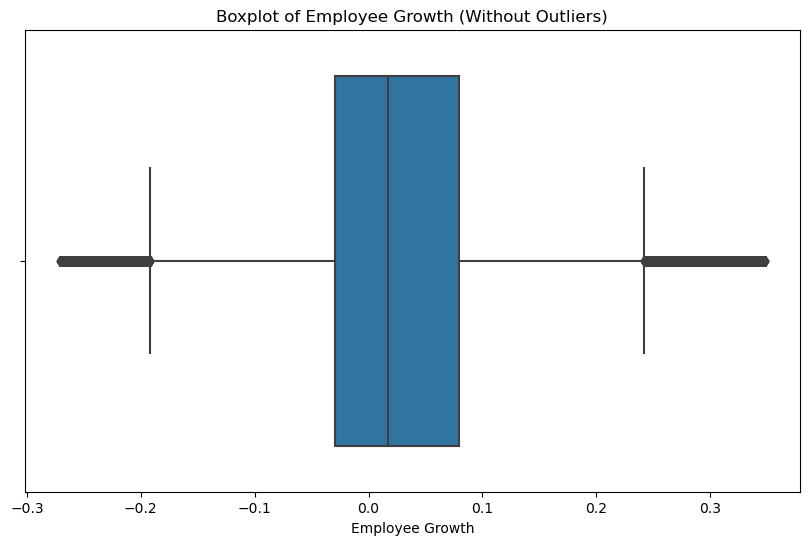

In [102]:
 
features=['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']
df_filter=pd.DataFrame()
for filter in features :
    Q1=df_filled[filter].quantile(0.25)
    Q3=df_filled[filter].quantile(0.75)
    IQR=Q3-Q1
### Quartile range to find the outliers 
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    column_filtered=df_filled[(df_filled[filter]>=lower_bound)&(df_filled[filter]<=upper_bound)]
    df_filter[filter]=column_filtered[filter]
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filter,data=column_filtered)
    plt.title(f'Boxplot of {filter} (Without Outliers)')
    plt.show()

In [103]:
df_filter ## Check the null values if any 

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.051844,0.059733,0.017241
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,NaN
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,NaN,0.174115,NaN,NaN,-1.846719,-0.073287,NaN,-0.076923
92868,-1.807630,0.093838,-1.204734,-0.121122,NaN,0.215844,NaN,NaN,-2.474549,-0.201835,-0.010544,-0.208333
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,NaN,NaN,NaN,-0.168001,-0.020206,-0.105263
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


In [104]:
df_filled_new =df_filter.fillna(df_filter.median()) ## Fill the null values with the column median 

In [105]:
df_filled_new

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.051844,0.059733,0.017241
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.017241
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,0.230000,0.174115,0.070000,0.040000,-1.846719,-0.073287,0.059733,-0.076923
92868,-1.807630,0.093838,-1.204734,-0.121122,0.230000,0.215844,0.070000,0.040000,-2.474549,-0.201835,-0.010544,-0.208333
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,0.070000,0.040000,43.040000,-0.168001,-0.020206,-0.105263
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


In [106]:
df_filled_new.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000,84476.000000
mean,0.587147,0.245832,0.032554,0.056401,0.369805,0.882067,0.077810,0.016651,83.125336,0.051162,0.066478,0.025708
std,1.225726,0.260595,0.507724,0.105656,0.498158,0.647902,0.090514,0.088977,122.721751,0.142580,0.139637,0.103917
min,-2.640000,-0.550000,-2.040000,-0.314959,-1.230000,-0.490000,-0.244690,-0.304856,-331.840000,-0.364561,-0.333424,-0.270833
25%,-0.120000,0.060000,-0.040000,0.020000,0.010000,0.380000,0.044984,-0.010000,14.880000,-0.013500,0.000000,-0.010811
50%,0.280000,0.210000,0.130000,0.070000,0.230000,0.790000,0.070000,0.040000,43.040000,0.051844,0.059733,0.017241
75%,1.320000,0.410000,0.300000,0.110000,0.600000,1.270000,0.120000,0.060000,103.240000,0.104719,0.120779,0.062066
max,4.032256,0.970000,1.710000,0.364336,2.050000,2.860611,0.354839,0.293228,583.130000,0.497970,0.499243,0.347826


DATA BALANCING 

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [113]:
scaler=StandardScaler()
df_filled_new_scaler=pd.DataFrame()
df_filled_new_scaler[features]=scaler.fit_transform(df_filled_new[features])

In [115]:
df_filled_new_scaler

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,0.810017,0.438108,0.290408,0.696599,1.927501,1.370484,-0.086290,1.498693,-0.659262,0.004779,-0.048307,-0.081476
1,0.671323,0.438108,0.310104,0.601952,1.887353,1.092662,-0.086290,1.273916,-0.657714,0.527118,-0.373830,0.139251
2,-0.226110,0.284612,0.191929,0.223361,1.325279,1.030924,-0.307252,0.262417,-0.656492,2.222725,1.872231,-0.081476
3,0.100229,0.131116,0.211625,0.223361,0.863576,0.783971,-0.196771,0.374806,-0.634328,-0.504780,-1.327612,-1.170153
4,0.132863,0.629978,0.191929,0.223361,-0.340869,0.645061,-0.196771,0.262417,-0.606623,1.275967,0.575274,0.262924
...,...,...,...,...,...,...,...,...,...,...,...,...
84471,-1.693144,-1.002813,-1.558755,-1.072411,-0.280646,-1.092691,-0.086290,0.262417,-0.692400,-0.872839,-0.048307,-0.987629
84472,-1.953773,-0.583263,-2.436944,-1.680212,-0.280646,-1.028284,-0.086290,0.262417,-0.697516,-1.774429,-0.551593,-2.252202
84473,-0.491799,-0.792698,-0.064117,-1.313992,0.752982,-0.969105,-0.086290,0.262417,-0.326638,-1.537128,-0.620790,-1.260348
84474,-0.587575,-0.737373,-0.122164,-0.524372,0.411046,-1.059401,-0.803297,-1.151899,-0.380134,0.180771,-1.700184,-0.813455


In [116]:
df_filled_new

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.051844,0.059733,0.017241
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.017241
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,0.230000,0.174115,0.070000,0.040000,-1.846719,-0.073287,0.059733,-0.076923
92868,-1.807630,0.093838,-1.204734,-0.121122,0.230000,0.215844,0.070000,0.040000,-2.474549,-0.201835,-0.010544,-0.208333
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,0.070000,0.040000,43.040000,-0.168001,-0.020206,-0.105263
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


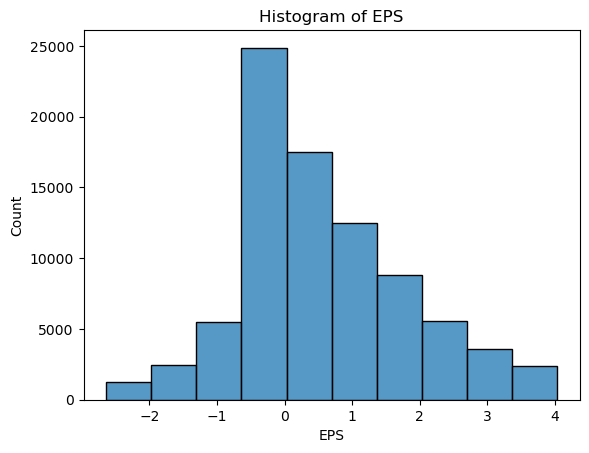

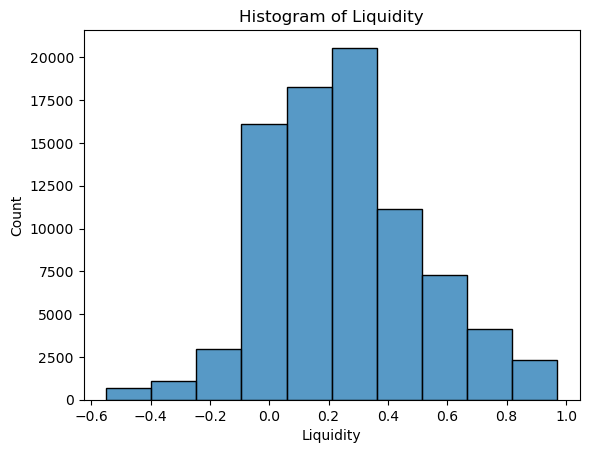

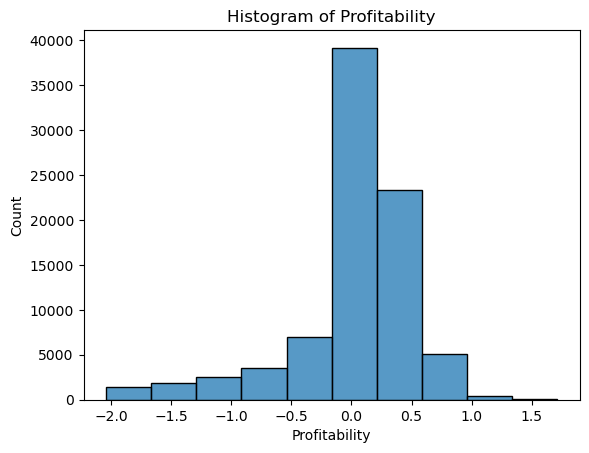

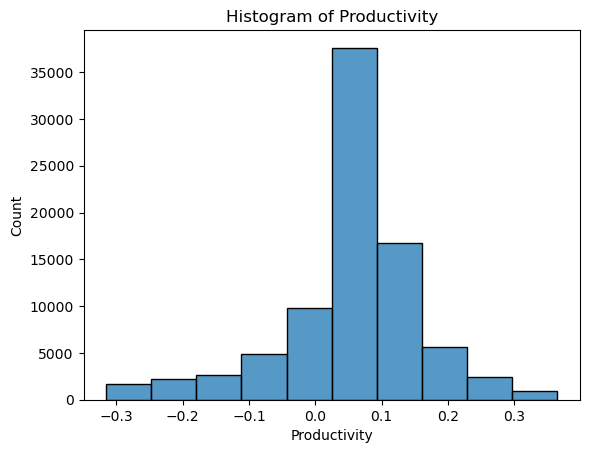

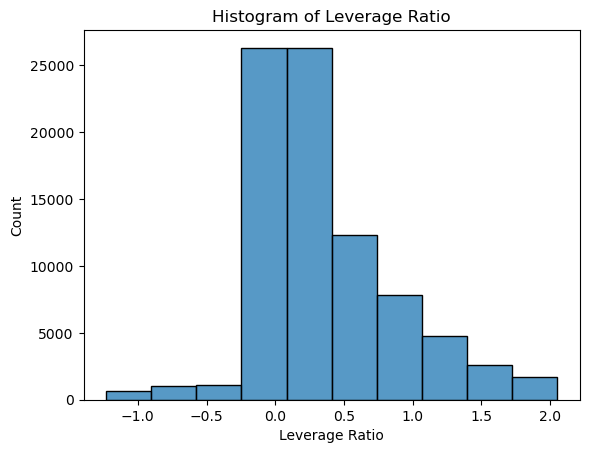

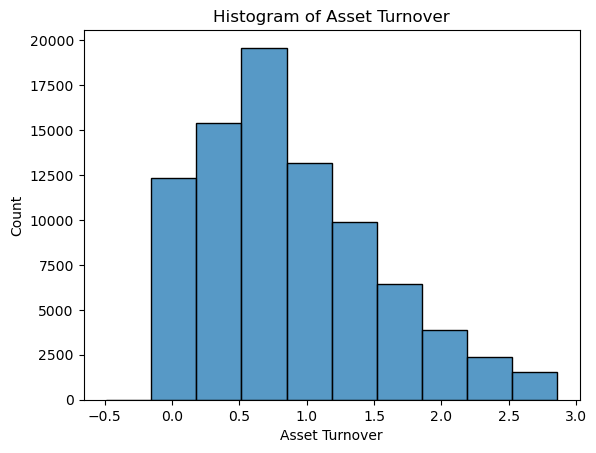

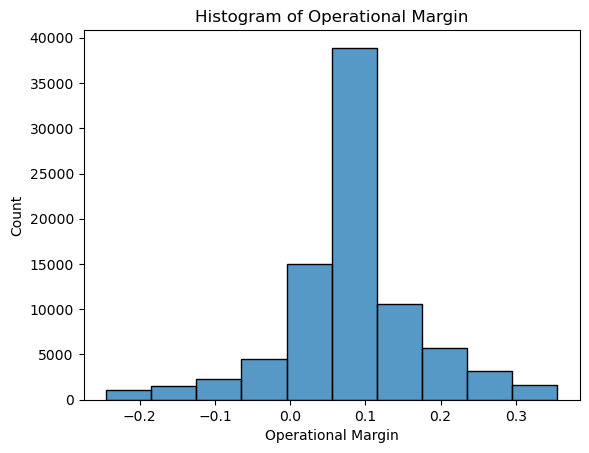

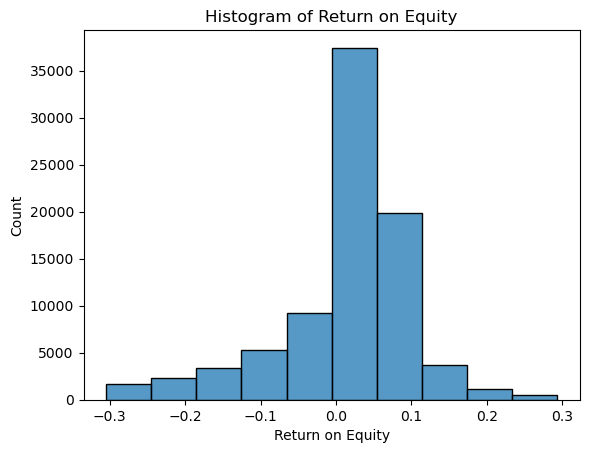

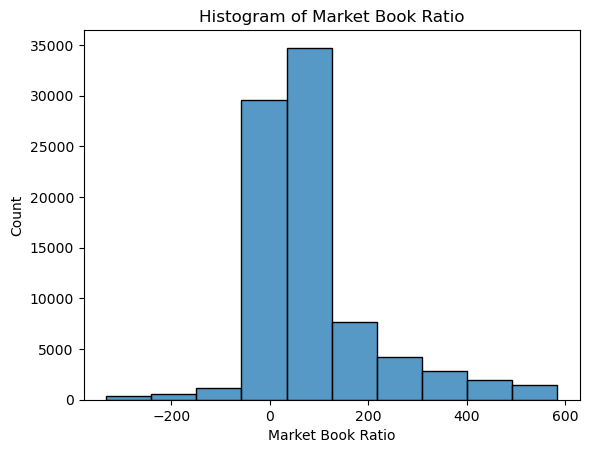

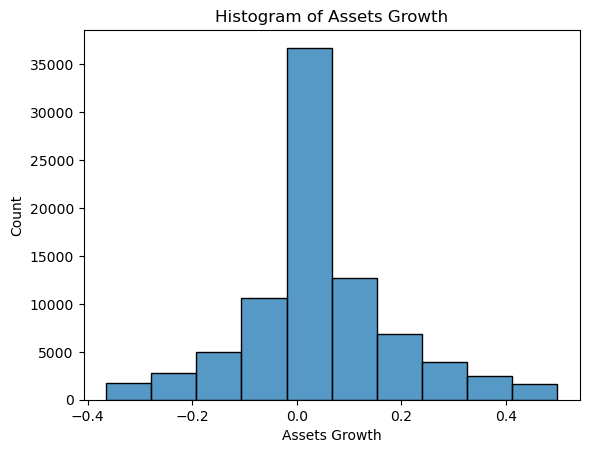

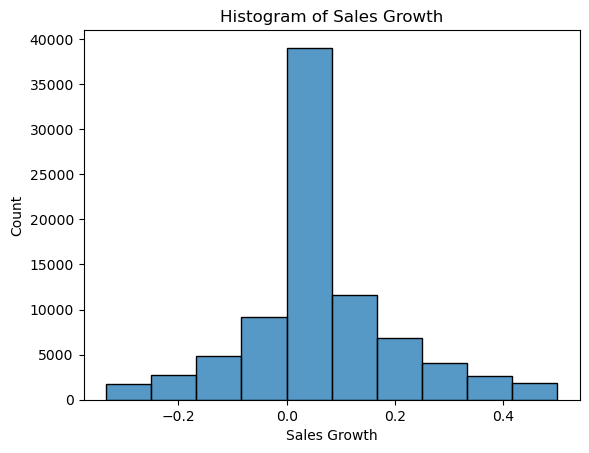

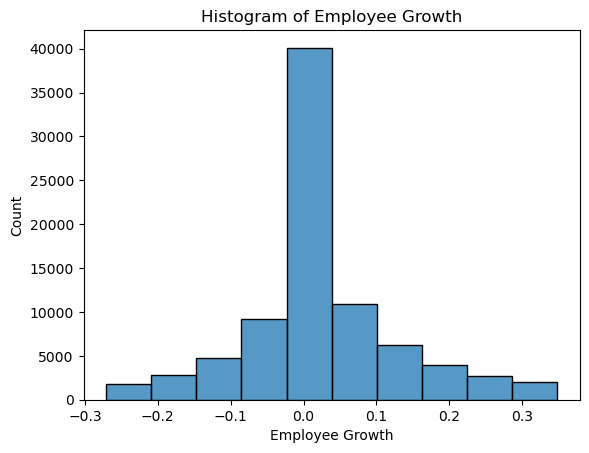

In [119]:
features=['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']
for features in df_filled_new:
    plt.figure()  
    sns.histplot(data=df_filled_new, x=features, bins=10)
    plt.title(f'Histogram of {features}')
    plt.show()

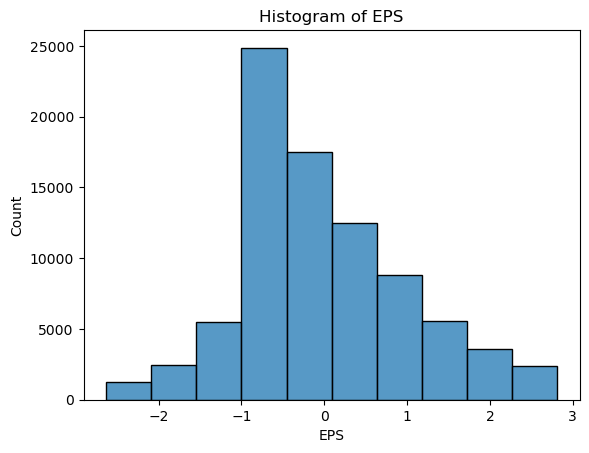

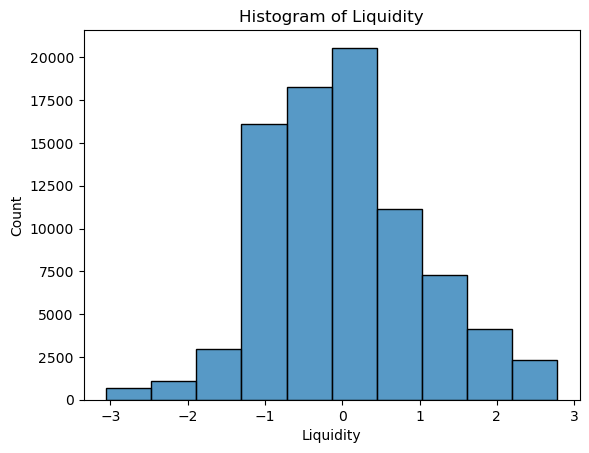

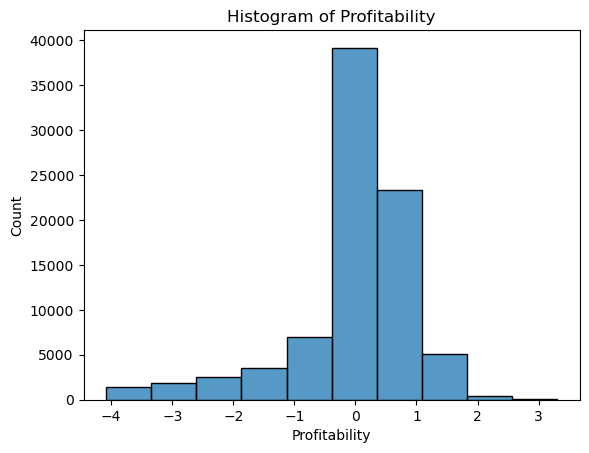

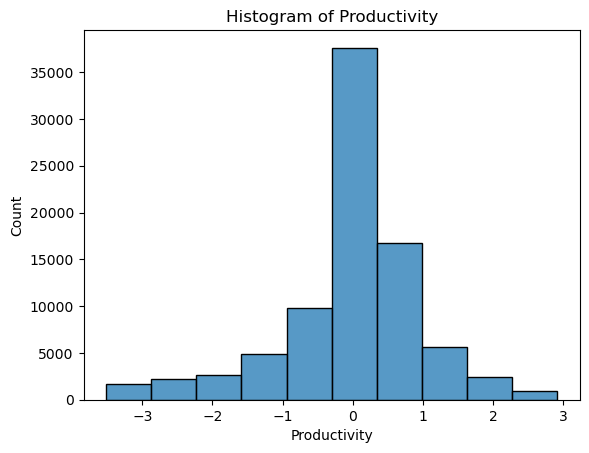

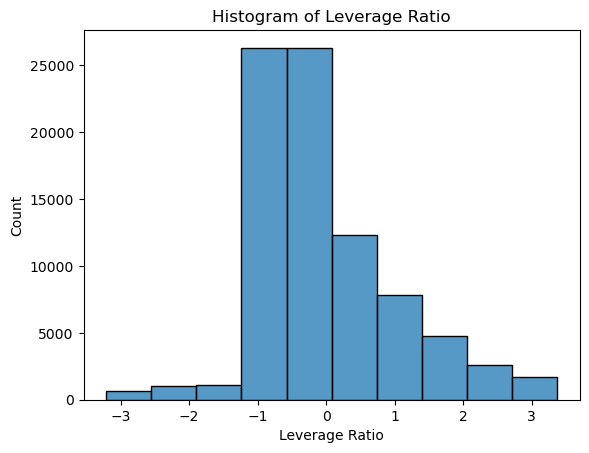

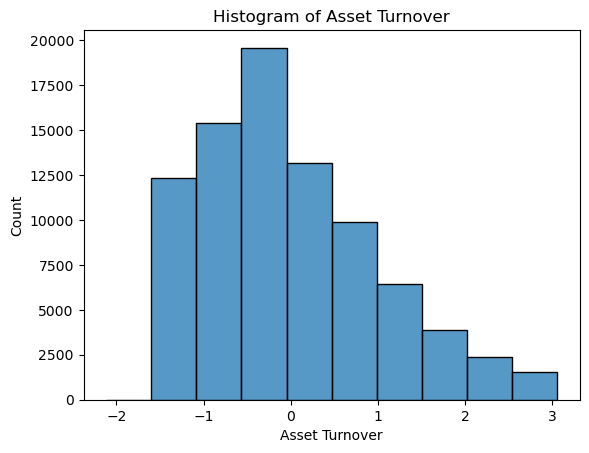

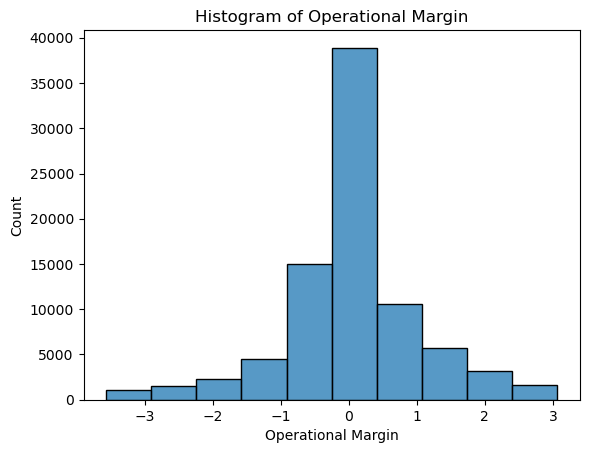

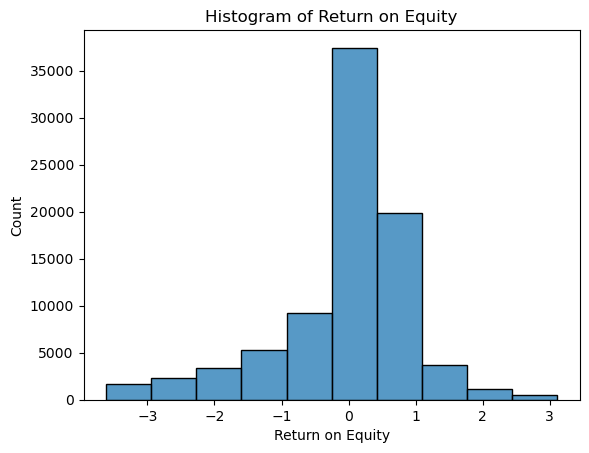

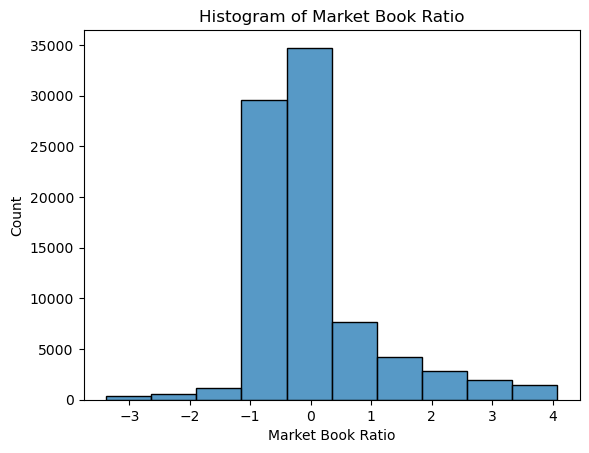

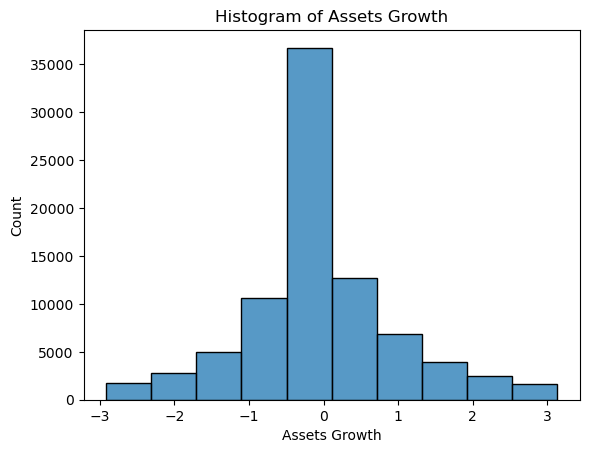

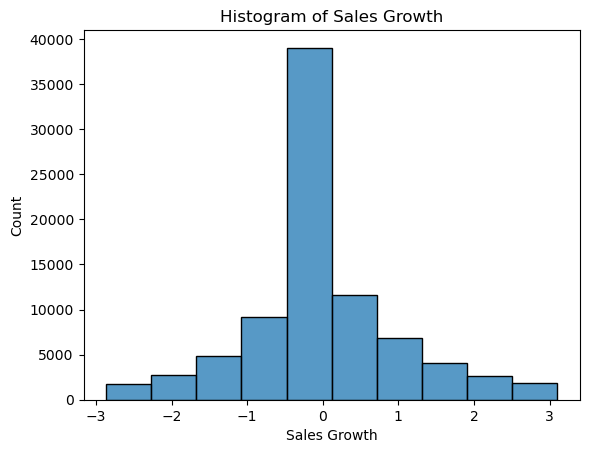

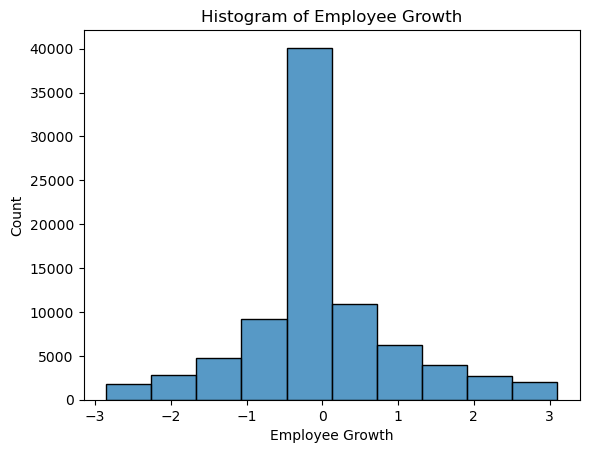

In [118]:
features=['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']
for features in df_filled_new_scaler:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data=df_filled_new_scaler, x=features, bins=10)
    plt.title(f'Histogram of {features}')
    plt.show()


MODEL EVALUATION AND SELECTION 

LOGISTICAL REGRESSION APPLIED 

(array([92314.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   558.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

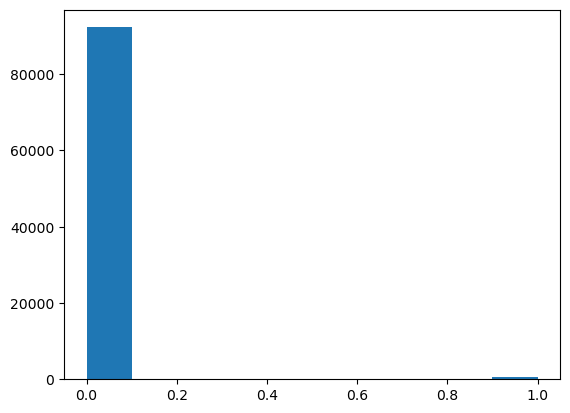

In [122]:
plt.hist(df_filled['BK'])

MODEL TRAINING 

In [123]:
from sklearn.model_selection import train_test_split
X = df_filled.drop('BK', axis=1)
y = df_filled['BK']
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=.2, random_state = 42)

(array([73853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   444.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

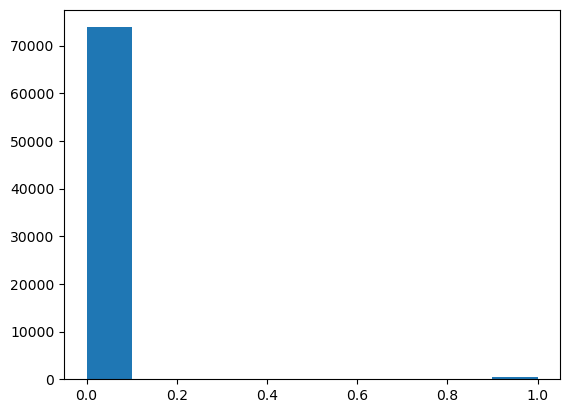

In [124]:
plt.hist(y_train)

In [125]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log =LogisticRegression(random_state=42)
log.fit(X_train,y_train)

MODEL EVALUATION

In [127]:
scores =cross_val_score(log ,X_train,y_train,
                        cv=10, n_jobs=-1)

In [128]:
scores

array([0.88559892, 0.97577389, 0.99313594, 0.99340511, 0.99205922,
       0.97213997, 0.98748318, 0.99259658, 0.98923139, 0.98223179])

In [129]:
np.mean(scores)

0.9763655997276686

In [130]:
from sklearn.metrics import classification_report 
y_predh = log.predict(X_test)
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18461
           1       0.18      0.04      0.07       114

    accuracy                           0.99     18575
   macro avg       0.59      0.52      0.53     18575
weighted avg       0.99      0.99      0.99     18575



In [138]:
df_filled_new_scaler.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04,8.447600e+04
mean,4.716889e-15,-5.102555e-15,5.048594e-14,1.897502e-14,1.013799e-14,-2.115736e-14,-1.605946e-15,1.628894e-14,8.148214e-15,7.182143e-15,4.356568e-15,-1.659028e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.632861e+00,-3.053925e+00,-4.082072e+00,-3.514830e+00,-3.211461e+00,-2.117721e+00,-3.563023e+00,-3.613376e+00,-3.381371e+00,-2.915732e+00,-2.863898e+00,-2.853645e+00
25%,-5.769242e-01,-7.131114e-01,-1.429006e-01,-3.445250e-01,-7.222760e-01,-7.749167e-01,-3.626692e-01,-2.995261e-01,-5.561014e-01,-4.535170e-01,-4.760850e-01,-3.514246e-01
50%,-2.505851e-01,-1.375015e-01,1.919290e-01,1.287133e-01,-2.806464e-01,-1.421007e-01,-8.628976e-02,2.624174e-01,-3.266379e-01,4.779400e-03,-4.830726e-02,-8.147582e-02
75%,5.978967e-01,6.299782e-01,5.267586e-01,5.073040e-01,4.620942e-01,5.987570e-01,4.661163e-01,4.871948e-01,1.639056e-01,3.756304e-01,3.888730e-01,3.498729e-01
max,2.810685e+00,2.778922e+00,3.303874e+00,2.914536e+00,3.372835e+00,3.053792e+00,3.060643e+00,3.108416e+00,4.074320e+00,3.133747e+00,3.099239e+00,3.099771e+00


MODEL EVALUATION ON BANKRUPTCY

In [144]:
features_1 =['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']

In [145]:
newData_byPred = pd.DataFrame([[4.716889e-15,-5.102555e-15,5.048594e-14,1.897502e-14,1.013799e-14,-2.115736e-14,-1.605946e-15,1.628894e-14,8.148214e-15,7.182143e-15,4.356568e-15,-1.659028e-15]], 
                              columns=features_1)



predicted_Bankrupcy = log.predict(newData_byPred)

print("Predicted Bankrupcy:", predicted_Bankrupcy)

Predicted Bankrupcy: [0]


In [147]:
newData_byPred = pd.DataFrame([[-1,-1,-1,-1,-1,-1,1,1,1,1,1,1]], 
                              columns=features_1)
predicted_Bankrupcy = log.predict(newData_byPred)

print("Predicted Bankrupcy:", predicted_Bankrupcy)

Predicted Bankrupcy: [0]


In [148]:
newData_byPred = pd.DataFrame([[0.5,0.75,-1,-0.45,-0.75,-0.68,0.45,0.46,0.12,0.84,0.82,1]], 
                              columns=features_1)
predicted_Bankrupcy = log.predict(newData_byPred)

print("Predicted Bankrupcy:", predicted_Bankrupcy)

Predicted Bankrupcy: [0]


The reason for doing the logistical regression is that the bankrupcy data provided is binary either 1 or 0 and with various features such as the Earnings per share ,Liquidity ,Profitability ,Operational Margin it is flexible to handle multiple predictor values and identify the correct predictors to analysis whether it would lead to bankrupcy or not.

SECOND MODEL EVALUATION

MODEL EVALUATION AND SELECTION

RANDOM FORREST APPLIED

In [172]:
df_filled_new_scaler_RF=pd.DataFrame()
df_filled_new_scaler_RF[features_1]=df_filled_new_scaler


In [178]:
features_1=['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']

In [179]:
df_filled_new_scaler_RF=df_filled_new_scaler.copy()

In [180]:
df_filled_new_scaler_RF

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,0.810017,0.438108,0.290408,0.696599,1.927501,1.370484,-0.086290,1.498693,-0.659262,0.004779,-0.048307,-0.081476
1,0.671323,0.438108,0.310104,0.601952,1.887353,1.092662,-0.086290,1.273916,-0.657714,0.527118,-0.373830,0.139251
2,-0.226110,0.284612,0.191929,0.223361,1.325279,1.030924,-0.307252,0.262417,-0.656492,2.222725,1.872231,-0.081476
3,0.100229,0.131116,0.211625,0.223361,0.863576,0.783971,-0.196771,0.374806,-0.634328,-0.504780,-1.327612,-1.170153
4,0.132863,0.629978,0.191929,0.223361,-0.340869,0.645061,-0.196771,0.262417,-0.606623,1.275967,0.575274,0.262924
...,...,...,...,...,...,...,...,...,...,...,...,...
84471,-1.693144,-1.002813,-1.558755,-1.072411,-0.280646,-1.092691,-0.086290,0.262417,-0.692400,-0.872839,-0.048307,-0.987629
84472,-1.953773,-0.583263,-2.436944,-1.680212,-0.280646,-1.028284,-0.086290,0.262417,-0.697516,-1.774429,-0.551593,-2.252202
84473,-0.491799,-0.792698,-0.064117,-1.313992,0.752982,-0.969105,-0.086290,0.262417,-0.326638,-1.537128,-0.620790,-1.260348
84474,-0.587575,-0.737373,-0.122164,-0.524372,0.411046,-1.059401,-0.803297,-1.151899,-0.380134,0.180771,-1.700184,-0.813455


In [186]:
df_filled_new_scaler_RF['BK']=-1
df_filled_new_scaler_RF

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,0.810017,0.438108,0.290408,0.696599,1.927501,1.370484,-0.086290,1.498693,-0.659262,0.004779,-0.048307,-0.081476,-1
1,0.671323,0.438108,0.310104,0.601952,1.887353,1.092662,-0.086290,1.273916,-0.657714,0.527118,-0.373830,0.139251,-1
2,-0.226110,0.284612,0.191929,0.223361,1.325279,1.030924,-0.307252,0.262417,-0.656492,2.222725,1.872231,-0.081476,-1
3,0.100229,0.131116,0.211625,0.223361,0.863576,0.783971,-0.196771,0.374806,-0.634328,-0.504780,-1.327612,-1.170153,-1
4,0.132863,0.629978,0.191929,0.223361,-0.340869,0.645061,-0.196771,0.262417,-0.606623,1.275967,0.575274,0.262924,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84471,-1.693144,-1.002813,-1.558755,-1.072411,-0.280646,-1.092691,-0.086290,0.262417,-0.692400,-0.872839,-0.048307,-0.987629,-1
84472,-1.953773,-0.583263,-2.436944,-1.680212,-0.280646,-1.028284,-0.086290,0.262417,-0.697516,-1.774429,-0.551593,-2.252202,-1
84473,-0.491799,-0.792698,-0.064117,-1.313992,0.752982,-0.969105,-0.086290,0.262417,-0.326638,-1.537128,-0.620790,-1.260348,-1
84474,-0.587575,-0.737373,-0.122164,-0.524372,0.411046,-1.059401,-0.803297,-1.151899,-0.380134,0.180771,-1.700184,-0.813455,-1


In [275]:
features_1=['EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']
X=df_filled[features_1]
y=df_filled['BK']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [285]:
Model_RF= RandomForestClassifier()

In [286]:
Model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [287]:
y_pred = Model_RF.predict(X_test)

In [296]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score


In [300]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [301]:
## Confusion Matrix
cm

array([[18461,     0],
       [  113,     1]], dtype=int64)

In [302]:
##Accuracy
accuracy

0.9939165545087483

In [303]:
##Precision 
precision

1.0

In [304]:
### F1 Score
f1

0.017391304347826087

In [305]:
from sklearn.metrics import classification_report 
y_predh = Model_RF.predict(X_test)
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18461
           1       1.00      0.01      0.02       114

    accuracy                           0.99     18575
   macro avg       1.00      0.50      0.51     18575
weighted avg       0.99      0.99      0.99     18575



MODEL EVALUATION AND TESTING 

In [293]:
new_data = pd.DataFrame([[-2.123,-0.989,-1.706,-0.152,-0.353,5.908,-0.026,-1.573,-1.561,-0.237,-0.171,0.090]], columns=X.columns)
new_data_scaled = scaler.transform(new_data)
prediction = Model_RF.predict(new_data_scaled)

print("Prediction1:", prediction)


Prediction1: [0]


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [295]:
new_data = pd.DataFrame([[0.100229,0.131116,0.211625,0.223361,0.863576,0.783971,-0.196771,0.374806,-0.634328,-0.504780,-1.327612,-1.170153]], columns=X.columns)
new_data_scaled = scaler.transform(new_data)
prediction = Model_RF.predict(new_data_scaled)

print("Prediction1:", prediction)

Prediction1: [0]


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


FINDINGS AND CONCLUSION 

The Random Forrest model has provided an accuracy of 0.99 which is idenntical to the value sthat we have recieved from the logistiical regression and I believe that the randm ofrrest can be a better model compared to the Logistical regression as the Random forrest from my evaluation was more flexible while dealing with the outliers and work in non linear envirnoment when compared to the Logistical regression .Random forrest from my evaluation was found to be more robust than the Logistical regression  